In [2]:
#Python environment contains analytics libraries installed

import numpy as np  #Linear algebra
import pandas as pd #Data processing
import sklearn  #ML algorithms

In [3]:
## If using Google Colab
##Read file name and content
#
## Load data file to colab
#
#from google.colab import files 
#uploaded = files.upload()
#

## Read Data

In [4]:
## Read file name and content for Google Colab
#import io
#
## Assuming only one file was uploaded, get its name
#for fn in uploaded.keys():
#  file_name = fn
#
## Decode the uploaded file to a Pandas Dataframe
#df = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')))
#display(df.head(10))
#print(df.shape)

In [5]:
# If using url we modify read data
#url ="https://www.kaggle.com/datasets/sonalshinde123/customer-churn-prediction-dataset/data"
#df = pd.read_csv(url)
#display(df.head(10))
#print (df.shape)

### Load Data

In [6]:
# If file stored in same repo we modify read data
file_name = "train.csv"
df = pd.read_csv(file_name)
display(df.head(10))
print(df.shape)

,customer_id,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn
0,5895,10,41.89,418.90,Two year,Cash,Fiber,No,No,2,No
1,3729,25,106.73,2668.25,Month-to-month,Debit,Fiber,No,Yes,0,No
2,8959,24,50.02,1200.48,Month-to-month,Debit,Fiber,Yes,No,0,No
3,7672,34,58.98,2005.32,Two year,Credit,Fiber,Yes,Yes,1,Yes
4,6000,62,91.16,5651.92,Month-to-month,UPI,Fiber,No,Yes,1,Yes
5,5752,6,85.23,511.38,Month-to-month,Debit,Fiber,Yes,No,0,No
6,1689,44,100.87,4438.28,Month-to-month,Debit,DSL,No,No,0,No
7,6837,9,93.01,837.09,One year,Cash,DSL,No,Yes,3,No
8,6537,29,72.20,2093.80,One year,Cash,Fiber,Yes,Yes,2,No
9,4843,22,48.02,1056.44,Month-to-month,Credit,Fiber,Yes,No,0,Yes


(16000, 11)


Our dataset contains 16000 rows and 11 columns (including *customer_id* and target column *churn*).

*tenure*, *monthly_charges*, *total_charges*, *support_calls* have continuous numeric data.

*Contract*, *payment_method*, *internet_service*, *tech_support*, *online_security* have discrete possible text values.

Target variable *churn* has discrete possible text values.

## Data Preprocessing

In [7]:
#Overview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       16000 non-null  int64  
 1   tenure            16000 non-null  int64  
 2   monthly_charges   16000 non-null  float64
 3   total_charges     16000 non-null  float64
 4   contract          16000 non-null  object 
 5   payment_method    16000 non-null  object 
 6   internet_service  14373 non-null  object 
 7   tech_support      16000 non-null  object 
 8   online_security   16000 non-null  object 
 9   support_calls     16000 non-null  int64  
 10  churn             16000 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 1.3+ MB


In [8]:
# Split data to features and target columns
X = df.drop(['customer_id', 'churn'], axis=1) #Create a dataframe of features for modelling
y = df['churn'] #customer churn is our target variable

display("Features (X) head:", X.head())
display("Target (y) head:", y.head())

'Features (X) head:'

,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls
0,10,41.89,418.90,Two year,Cash,Fiber,No,No,2
1,25,106.73,2668.25,Month-to-month,Debit,Fiber,No,Yes,0
2,24,50.02,1200.48,Month-to-month,Debit,Fiber,Yes,No,0
3,34,58.98,2005.32,Two year,Credit,Fiber,Yes,Yes,1
4,62,91.16,5651.92,Month-to-month,UPI,Fiber,No,Yes,1


'Target (y) head:'

0     No
1     No
2     No
3    Yes
4    Yes
Name: churn, dtype: object

In [9]:
# Mapping target variable from Pandas object to bool
y =y.map({'Yes': True, 'No': False})

display(y.head())
display(y.dtype)

0    False
1    False
2    False
3     True
4     True
Name: churn, dtype: bool

dtype('bool')

In [10]:
X.describe()

,tenure,monthly_charges,total_charges,support_calls
count,16000.000000,16000.000000,16000.000000,16000.000000
mean,36.407313,69.969794,2540.721879,1.516750
std,20.766924,28.929288,1879.923847,1.227472
min,1.000000,20.000000,20.230000,0.000000
25%,18.000000,44.987500,1044.472500,1.000000
50%,36.000000,70.050000,2101.840000,1.000000
75%,54.000000,95.127500,3687.840000,2.000000
max,72.000000,119.990000,8629.920000,8.000000


We have 4 columns with continuous numeric data *tenure*, *monthly_charges*, *total_charges*, *support_calls*.

In [11]:
# Missing values in target
missing_values_count =y.isnull().sum()
print ('Target values missing: ',missing_values_count)

Target values missing:  0


In [12]:
# Missing values in data features
missing_values_count =X.isnull().sum()
print ('Feature values missing: ',missing_values_count)

Feature values missing:  tenure                 0
monthly_charges        0
total_charges          0
contract               0
payment_method         0
internet_service    1627
tech_support           0
online_security        0
support_calls          0
dtype: int64


All columns except *internet_service* have no missing data values.

*internet_service* has 1627 missing values. This is a significant amount of data, hence we will investigate and address the missing values to be useful to create a model.

In [13]:
# Mapping function from Pandas objectwith Yes/No to bool
X['online_security'] =X['online_security'].map({'Yes': True, 'No': False})

display(X['online_security'].head())
display(X['online_security'].dtype)

# Mapping function from Pandas object to bool
X['tech_support'] =X['tech_support'].map({'Yes': True, 'No': False})

display(X['tech_support'].head())
display(X['tech_support'].dtype)

0    False
1     True
2    False
3     True
4     True
Name: online_security, dtype: bool

dtype('bool')

0    False
1    False
2     True
3     True
4    False
Name: tech_support, dtype: bool

dtype('bool')

In [14]:
# Import Visualization Python libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Example: Converting a column to 'category' dtype
df['contract'] = df['contract'].astype('category')
print (df['contract'].dtype)

# Example: Converting a column to 'category' dtype
df['payment_method'] = df['payment_method'].astype('category')
print (df['payment_method'].dtype)

# Example: Converting a column to 'category' dtype
df['internet_service'] = df['internet_service'].astype('category')
print (df['internet_service'].dtype)

category
category
category


In [16]:
# Categorical columns converted from Pandas object to category.
cat_col =['contract', 'payment_method', 'internet_service']

In [19]:
# Define a function to plot categorical columns in data
def plot_categorical_distributions(dataframe, categorical_columns):
    """
    Generates bar plots for the distribution of specified categorical columns in a DataFrame.

    Args:
        dataframe (pd.DataFrame): The input DataFrame.
        categorical_columns (list): A list of column names to plot.
    """
    for col in categorical_columns:
        if col in dataframe.columns:
            value_counts = dataframe[col].value_counts()

            plt.figure(figsize=(8, 6))
            # Updated sns.barplot call to address FutureWarning
            sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, palette='viridis')
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
            plt.tight_layout()
            plt.show()
        else:
            print(f"Column '{col}' not found in the DataFrame.")

print("Function 'plot_categorical_distributions' defined.")

Function 'plot_categorical_distributions' defined.


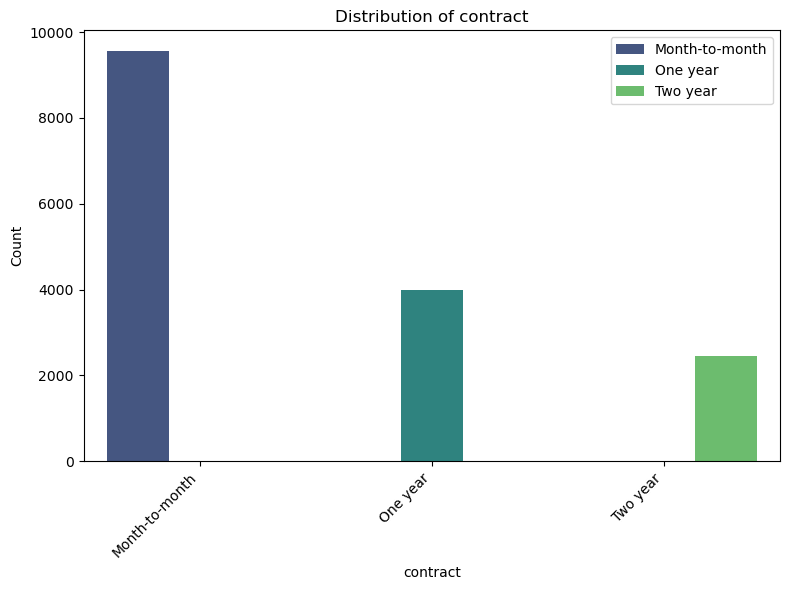

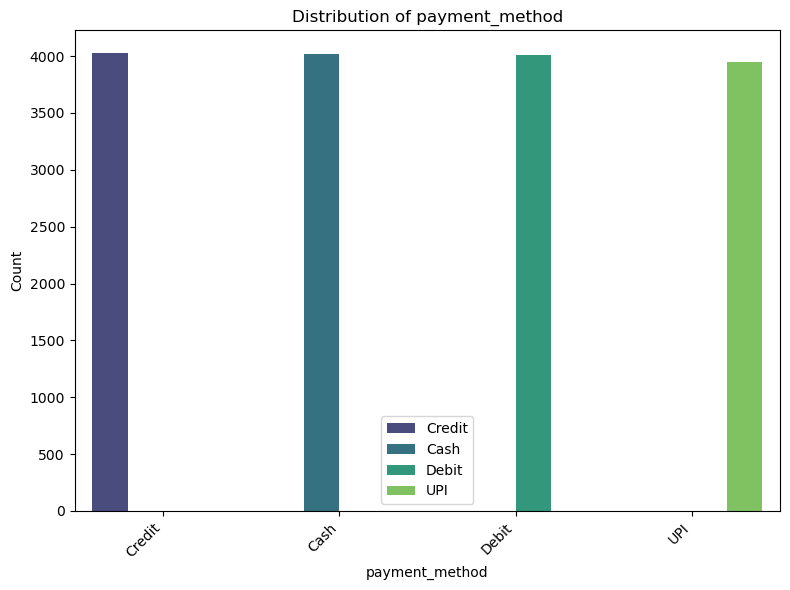

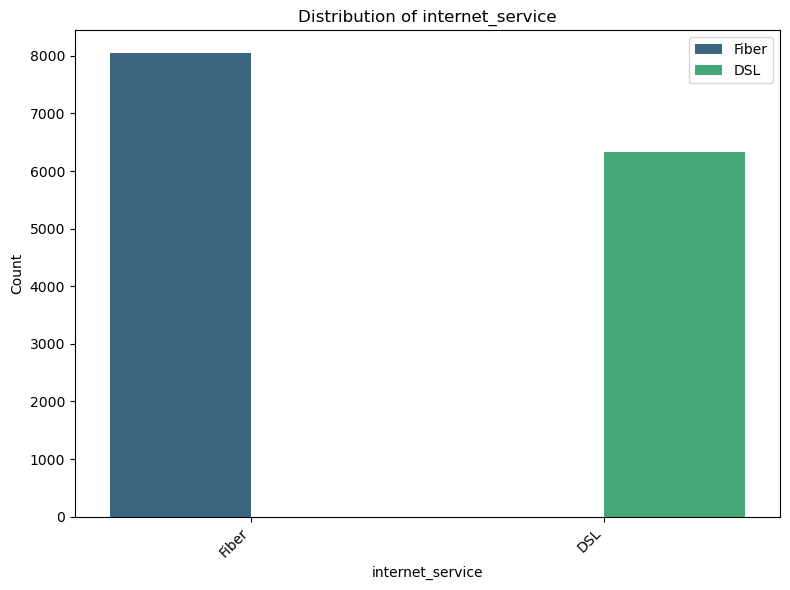

In [20]:
plot_categorical_distributions(X, cat_col)

In [21]:
# Code to boxplot continuous variables and clean them, check outliers etc.

### Impute Missing values

In [22]:
# Available data in internet_service
internet_service_counts = X['internet_service'].value_counts()
display(internet_service_counts)

Fiber    8041
DSL      6332
Name: internet_service, dtype: int64

Upon further investigation, *internet_service* has 2 categories *Fiber* or *DSL* values. The counts of each suggest significant proportion of missing data compared to each of the values.

We will impute the missing values with a Random Proportional imputer.

In [23]:
# fix seed for reproducibility
np.random.seed(42)

col = "internet_service"
#get distribution from non-missing values
probs = (
    X[col]
    .dropna()
    .value_counts(normalize=True)
)

# number of missing values
n_missing = X[col].isna().sum()

# sample categories proportionally
random_imputed = np.random.choice(
    probs.index,
    size=n_missing,
    p=probs.values
)

# assign back missing rows
X.loc[X[col].isna(), col] = random_imputed

## One-Hot Encode Categorical Features


In [26]:
X = pd.get_dummies(X, columns=['contract', 'payment_method', 'internet_service'], drop_first=True)
print("One-hot encoded 'contract', 'payment_method', and 'internet_service' columns.")

display("Updated X DataFrame head:", X.head())
display("Updated X DataFrame shape:", X.shape)

KeyError: "None of [Index(['contract', 'payment_method', 'internet_service'], dtype='object')] are in the [columns]"

In [27]:
X.head()

,tenure,monthly_charges,total_charges,tech_support,online_security,support_calls,contract_One year,contract_Two year,payment_method_Credit,payment_method_Debit,payment_method_UPI,internet_service_Fiber
0,10,41.89,418.90,False,False,2,0,1,0,0,0,1
1,25,106.73,2668.25,False,True,0,0,0,0,1,0,1
2,24,50.02,1200.48,True,False,0,0,0,0,1,0,1
3,34,58.98,2005.32,True,True,1,0,1,1,0,0,1
4,62,91.16,5651.92,False,True,1,0,0,0,0,1,1


## Train Logistic Regression Model

### Subtask:
Initialize and train a logistic regression model using the training data, incorporating feature scaling.


In [28]:
#Model training python libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

print("Imported LogisticRegression, StandardScaler, and Pipeline.")

Imported LogisticRegression, StandardScaler, and Pipeline.


In [30]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(random_state=42))
])

model.fit(X, y)

print("Logistic Regression model with StandardScaler trained successfully.")

Logistic Regression model with StandardScaler trained successfully.


## Make Predictions

In [31]:
## If file stored in same repo we modify read data
file_name_test = "test.csv"
df_test = pd.read_csv(file_name_test)

FileNotFoundError: [Errno 2] No such file or directory: 'test.csv'

In [ ]:
#

In [ ]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

print("Predictions generated successfully.")
display("Predicted class labels (first 5):", y_pred[:5])
display("Predicted probabilities (first 5):", y_pred_proba[:5])

## Evaluate Model Performance

### Subtask:
Evaluate the logistic regression model's performance using appropriate metrics.

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

print("Imported classification_report, accuracy_score, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay, and matplotlib.pyplot.")

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))


In [ ]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', values_format='d')
disp.ax_.set_title('Confusion Matrix for Logistic Regression Model')
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

print("Calculated FPR, TPR, thresholds, and ROC AUC.")

In [ ]:
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
roc_display.plot()
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

print(f"ROC AUC Score: {roc_auc:.4f}")